In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preparar datos (pruebas)

codigo de prueba

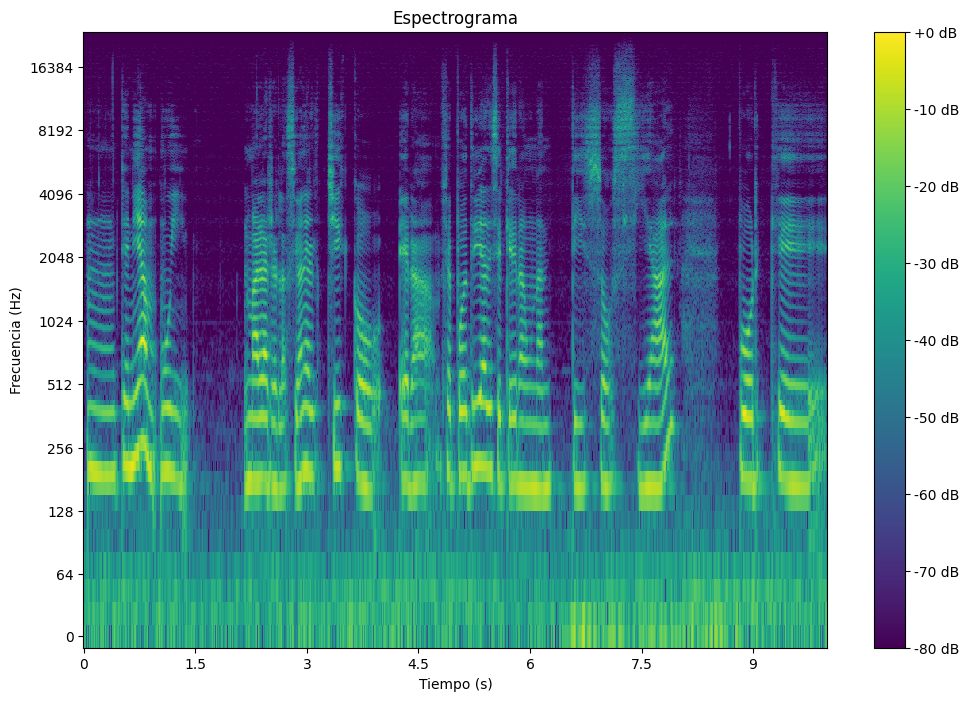

Espectrograma dimensiones: (1025, 938)


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo de audio
audio_path = '/content/drive/MyDrive/ML/Audios/Voz/audio1.wav'  # Reemplaza con la ruta de tu archivo de audio
y, sr = librosa.load(audio_path, sr=None)  # sr=None mantiene la frecuencia de muestreo original

# Calcular el espectrograma utilizando Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convertir el espectrograma en una escala logarítmica (dB)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Configurar el gráfico del espectrograma
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()
print(f"Espectrograma dimensiones: {S_db.shape}")

Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio9.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio19.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio11.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio15.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio23.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio4.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio5.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio1.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio25.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio13.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios

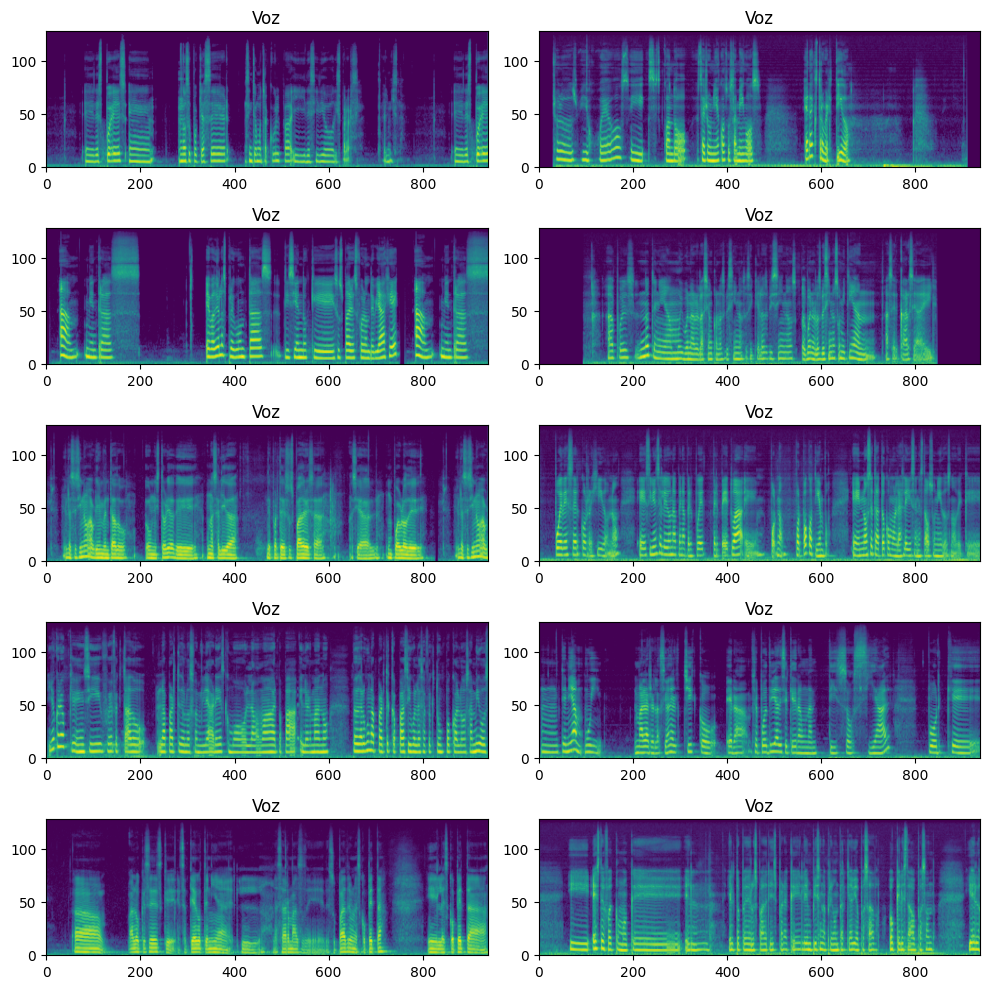

In [ ]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt

def audio_to_spectrogram(file_path, target_shape=(128, 938), n_mels=128, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path, sr=None)  # Cargar archivo de audio
    # Calcular el espectrograma mel del audio usando argumentos de palabras clave explícitamente
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    S_DB = librosa.power_to_db(S, ref=np.max)  # Convertir a decibelios

    # Ajustar el tamaño del espectrograma
    if S_DB.shape[1] < target_shape[1]:
        # Rellenar las columnas faltantes con el valor mínimo del espectrograma
        padding = np.min(S_DB) * np.ones((target_shape[0], target_shape[1] - S_DB.shape[1]))
        S_DB = np.hstack((S_DB, padding))

    return S_DB

def load_audios_and_convert(ruta_voces, ruta_ruido):
    espectrogramas = []
    etiquetas = []

    # Procesar audios de voces
    for file in os.listdir(ruta_voces):
        file_path = os.path.join(ruta_voces, file)
        if file_path.endswith('.wav'):  # Asegúrate de procesar solo archivos wav
            espectrograma = audio_to_spectrogram(file_path)
            espectrogramas.append(espectrograma)
            etiquetas.append(1)  # Suponiendo 1 para voces
            print(f"Espectrograma de voz: {file_path} dimensiones: {espectrograma.shape}")

    # Procesar audios de ruido
    for file in os.listdir(ruta_ruido):
        file_path = os.path.join(ruta_ruido, file)
        if file_path.endswith('.wav'):  # Asegúrate de procesar solo archivos wav
            espectrograma = audio_to_spectrogram(file_path)
            espectrogramas.append(espectrograma)
            etiquetas.append(0)  # Suponiendo 0 para ruido
            print(f"Espectrograma de ruido: {file_path} dimensiones: {espectrograma.shape}")

    return espectrogramas, etiquetas

def plot_spectrograms(espectrogramas, etiquetas):
    plt.figure(figsize=(10, 10))
    for i, (spectrogram, label) in enumerate(zip(espectrogramas, etiquetas)):
        plt.subplot(5, 2, i + 1)  # Adjust grid size based on your need
        plt.title('Voz' if label == 1 else 'Ruido')
        plt.imshow(spectrogram, aspect='auto', origin='lower')
        if i == 9:  # Limit to display only 10 spectrograms
            break
    plt.tight_layout()
    plt.show()

# Usa las funciones
ruta_voces = '/content/drive/MyDrive/ML/Audios/Voz'
ruta_ruido = '/content/drive/MyDrive/ML/Audios/NoVoz'
espectrogramas, etiquetas = load_audios_and_convert(ruta_voces, ruta_ruido)

# Llamar a la función de trazado
plot_spectrograms(espectrogramas, etiquetas)



# Preparar datos (codigo funcional)

In [ ]:
import librosa
import numpy as np
import os
from pathlib import Path

def audio_to_spectrogram(file_path, target_shape=(128, 938), n_mels=128, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path, sr=None)  # Cargar archivo de audio
    # Calcular el espectrograma mel del audio usando argumentos de palabras clave explícitamente
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    S_DB = librosa.power_to_db(S, ref=np.max)  # Convertir a decibelios

    # Ajustar el tamaño del espectrograma
    if S_DB.shape[1] < target_shape[1]:
        # Rellenar las columnas faltantes con el valor mínimo del espectrograma
        padding = np.min(S_DB) * np.ones((target_shape[0], target_shape[1] - S_DB.shape[1]))
        S_DB = np.hstack((S_DB, padding))

    return S_DB

def load_audios_and_convert(ruta_voces, ruta_ruido):
    espectrogramas = []
    etiquetas = []

    # Procesar audios de voces
    for file in os.listdir(ruta_voces):
        file_path = os.path.join(ruta_voces, file)
        if file_path.endswith('.wav'):  # Asegúrate de procesar solo archivos wav
            espectrograma = audio_to_spectrogram(file_path)
            espectrogramas.append(espectrograma)
            etiquetas.append(1)  # Suponiendo 1 para voces
            print(f"Espectrograma de voz: {file_path} dimensiones: {espectrograma.shape}")


    # Procesar audios de ruido
    for file in os.listdir(ruta_ruido):
        file_path = os.path.join(ruta_ruido, file)
        if file_path.endswith('.wav'):  # Asegúrate de procesar solo archivos wav
            espectrograma = audio_to_spectrogram(file_path)
            espectrogramas.append(espectrograma)
            etiquetas.append(0)  # Suponiendo 0 para ruido
            print(f"Espectrograma de ruido: {file_path} dimensiones: {espectrograma.shape}")

    return espectrogramas, etiquetas

# Usa las funciones
ruta_voces = '/content/drive/MyDrive/ML/Audios/Vozs'
ruta_ruido = '/content/drive/MyDrive/ML/Audios/NoVozs'
espectrogramas, etiquetas = load_audios_and_convert(ruta_voces, ruta_ruido)

print("Espectrogramas y etiquetas creados")


Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Vozs/audio107.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Vozs/audio19.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Vozs/audio62.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Vozs/audio92.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Vozs/audio50.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Vozs/audio96.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Vozs/audio67.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Vozs/audio54.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Vozs/audio84.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Vozs/audio14.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/My

# Division del dataset

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(espectrogramas, etiquetas, train_size=0.7, val_size=0.15, test_size=0.15):
    # Primero, dividimos en entrenamiento y temporal (validación + prueba)
    X_train, X_temp, y_train, y_temp = train_test_split(
        espectrogramas, etiquetas, train_size=train_size, random_state=42
    )

    # Ahora, dividimos el temporal en validación y prueba
    # Calculamos la nueva proporción para el split basado en el tamaño restante
    val_test_ratio = val_size / (val_size + test_size)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, train_size=val_test_ratio, random_state=42
    )

    return X_train, X_val, X_test, y_train, y_val, y_test



# Suponiendo que 'espectrogramas' y 'etiquetas' son los datos cargados
#X_train, X_val, X_test, y_train, y_val, y_test = split_data(espectrogramas, etiquetas)

# Primero dividir los datos en entrenamiento (70%) y no-entrenamiento (30%)
X_train, X_non_train, y_train, y_non_train = train_test_split(espectrogramas, etiquetas, test_size=0.3, random_state=42)
# Luego dividir el conjunto no-entrenamiento en validación (50% de 30%, es decir, 15% del total) y prueba (50% de 30%, es decir, 15% del total)
X_val, X_test, y_val, y_test = train_test_split(X_non_train, y_non_train, test_size=0.5, random_state=42)

# Verificación de las divisiones
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))
print("Tamaño del conjunto de prueba:", len(X_test))

print("Division del dataset listo")


import numpy as np

# Convertir listas a arrays numpy y asegurar que todos los datos tengan la forma correcta
X_train = np.array(X_train)[..., np.newaxis]  # Añade una dimensión de canal
X_val = np.array(X_val)[..., np.newaxis]
X_test = np.array(X_test)[..., np.newaxis]

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Verificar las formas de los datos
print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de y_test:", y_test.shape)

Tamaño del conjunto de entrenamiento: 168
Tamaño del conjunto de validación: 36
Tamaño del conjunto de prueba: 36
Division del dataset listo
Forma de X_train: (168, 128, 938, 1)
Forma de X_val: (36, 128, 938, 1)
Forma de X_test: (36, 128, 938, 1)
Forma de y_train: (168,)
Forma de y_val: (36,)
Forma de y_test: (36,)


# Modelo

Modelo funcional con 120 voz y 120 ruido

Epoch 1/6
7/7 - 41s - loss: 13.3254 - accuracy: 0.6845 - precision_3: 0.6860 - recall_3: 0.6941 - val_loss: 8.8018 - val_accuracy: 0.4167 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - 41s/epoch - 6s/step
Epoch 2/6
7/7 - 32s - loss: 5.9253 - accuracy: 0.7798 - precision_3: 0.7791 - recall_3: 0.7882 - val_loss: 43.9399 - val_accuracy: 0.4167 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - 32s/epoch - 5s/step
Epoch 3/6
7/7 - 33s - loss: 1.5293 - accuracy: 0.8571 - precision_3: 0.9178 - recall_3: 0.7882 - val_loss: 35.9933 - val_accuracy: 0.4167 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - 33s/epoch - 5s/step
Epoch 4/6
7/7 - 33s - loss: 1.4415 - accuracy: 0.9048 - precision_3: 0.8416 - recall_3: 1.0000 - val_loss: 36.3024 - val_accuracy: 0.4167 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - 33s/epoch - 5s/step
Epoch 5/6
7/7 - 32s - loss: 0.4239 - accuracy: 0.9345 - precision_3: 0.9625 - recall_3: 0.9059 - val_loss: 35.9611 - val_accuracy: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/engine/trainin

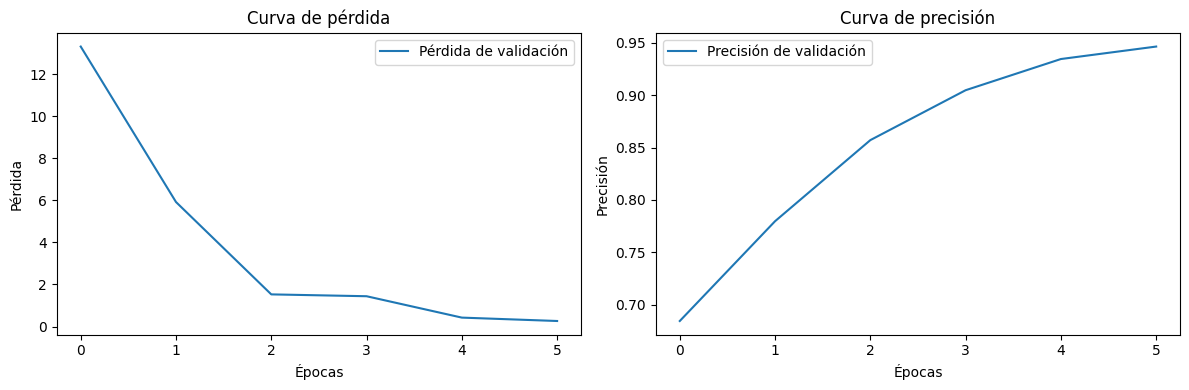

Precision de entrenamiento: se refiere al rendimiento del modelo en los datos de entrenamiento
Precision de validacion: se evalua en un conjunto de datos separado llamado conjunto de validacion (no se utiliza en entrenamiento)
Accuracy: 0.6111111111111112
Confusion Matrix:
[[22  0]
 [14  0]]
Precision en base a matriz:  0.6111111111111112


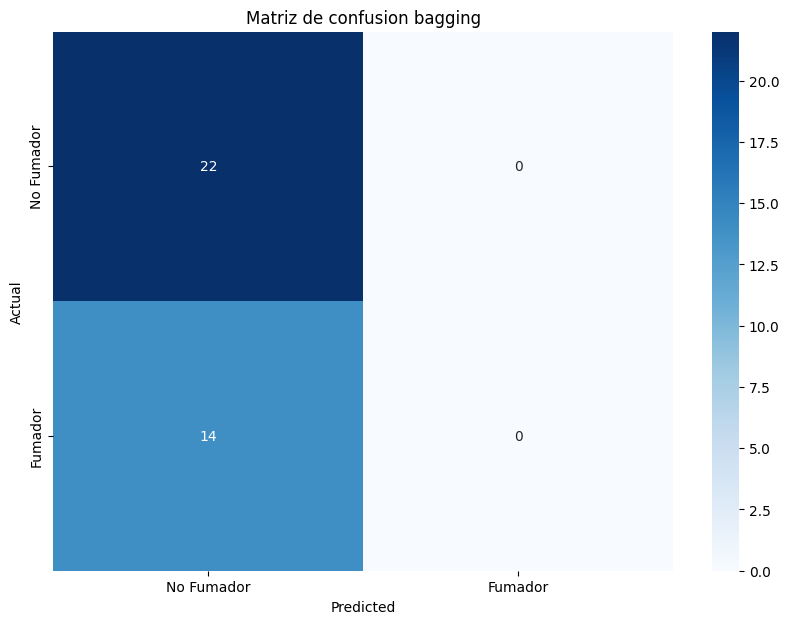

Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        22
           1       0.00      0.00      0.00        14

    accuracy                           0.61        36
   macro avg       0.31      0.50      0.38        36
weighted avg       0.37      0.61      0.46        36



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall  # Asegúrate de importar estas clases
import librosa
import numpy as np
import os
from pathlib import Path
from sklearn.ensemble import AdaBoostClassifier  # Importar el clasificador AdaBoost
from sklearn.linear_model import LogisticRegression  # Importar el clasificador de regresión logística
from sklearn.model_selection import train_test_split  # Importar función para dividir datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier  # Importar el clasificador AdaBoost
from sklearn.tree import DecisionTreeClassifier  # Importar el clasificador de árbol de decisión
#from sklearn.datasets import load_iris  # Importar el conjunto de datos Iris
from sklearn.model_selection import train_test_split  # Importar función para dividir datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Importar funciones para evaluar el modelo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_cnn_model():
    # El shape del input se definirá dinámicamente basado en los datos
    model = Sequential()

    # Capa convolucional 1
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 938, 1)))  # Ajustar según la forma de tus datos
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    # Capa convolucional 2
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))

    # Capa convolucional 3
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.6))

    # Capa de aplanamiento
    model.add(Flatten())

    # Capa densa
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Capa de salida
    model.add(Dense(1, activation='sigmoid'))

    # Compilación del modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

    return model

################################Entrenamiento#######################

# Preparar los datos (asegúrate de que los datos estén correctamente dimensionados y normalizados)

# Crear el modelo
model = create_cnn_model()

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=6,
    batch_size=24,
    validation_data=(X_val, y_val),
    verbose=2
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test Precision: {test_precision}, Test Recall: {test_recall}")

# Opcional: generar reporte de clasificación
from sklearn.metrics import classification_report
y_pred = model.predict(X_test) > 0.5  # Convertir probabilidades a etiquetas binarias
print(classification_report(y_test, y_pred, target_names=['Voz', 'Ruido']))

# Guardar el modelo
model.save('/content/drive/MyDrive/ML/CNN.h5')  # Cambia la ruta y el nombre del archivo según tus necesidades



# Visualizar las curvas de aprendizaje
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de validación')
#plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de pérdida')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de validación')
#plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curva de precisión')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)  # Calcular la precisión comparando las etiquetas reales y las predichas
print("Precision de entrenamiento: se refiere al rendimiento del modelo en los datos de entrenamiento")
print("Precision de validacion: se evalua en un conjunto de datos separado llamado conjunto de validacion (no se utiliza en entrenamiento)")
print(f'Accuracy: {accuracy}')  # Imprimir la precisión

# Obtener la matriz de confusión
conf_matrix1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix1)

Tn = conf_matrix1[0, 0]
Fp = conf_matrix1[0, 1]
Fn = conf_matrix1[1, 0]
Tp = conf_matrix1[1, 1]
P = (Tp + Tn) / (Tp + Tn + Fp + Fn)
print("Precision en base a matriz: ", P)
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fumador', 'Fumador'], yticklabels=['No Fumador', 'Fumador'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusion bagging')
plt.show()


# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# modelo con 30 y 30

Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio9.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio19.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio11.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio15.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio23.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio4.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio5.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio1.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio25.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios/Voz/audio13.wav dimensiones: (128, 938)
Espectrograma de voz: /content/drive/MyDrive/ML/Audios

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/engine/trainin

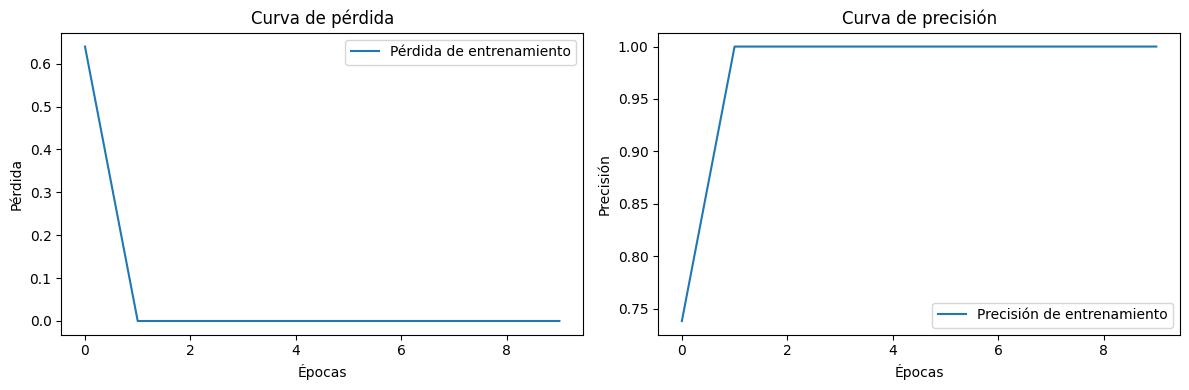

Accuracy: 0.6666666666666666
Confusion Matrix:
[[0 3]
 [0 6]]
Precision en base a matriz:  0.6666666666666666


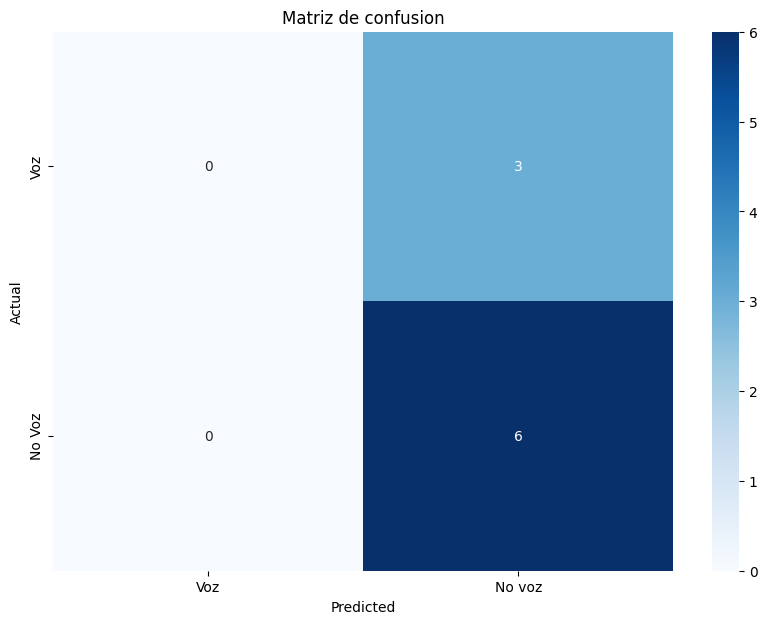

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      1.00      0.80         6

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import librosa
import numpy as np
import os
from pathlib import Path
from sklearn.ensemble import AdaBoostClassifier  # Importar el clasificador AdaBoost
from sklearn.linear_model import LogisticRegression  # Importar el clasificador de regresión logística
from sklearn.model_selection import train_test_split  # Importar función para dividir datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier  # Importar el clasificador AdaBoost
from sklearn.tree import DecisionTreeClassifier  # Importar el clasificador de árbol de decisión
#from sklearn.datasets import load_iris  # Importar el conjunto de datos Iris
from sklearn.model_selection import train_test_split  # Importar función para dividir datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Importar funciones para evaluar el modelo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def audio_to_spectrogram(file_path, target_shape=(128, 938), n_mels=128, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path, sr=None)  # Cargar archivo de audio
    # Calcular el espectrograma mel del audio usando argumentos de palabras clave explícitamente
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    S_DB = librosa.power_to_db(S, ref=np.max)  # Convertir a decibelios

    # Ajustar el tamaño del espectrograma
    if S_DB.shape[1] < target_shape[1]:
        # Rellenar las columnas faltantes con el valor mínimo del espectrograma
        padding = np.min(S_DB) * np.ones((target_shape[0], target_shape[1] - S_DB.shape[1]))
        S_DB = np.hstack((S_DB, padding))

    return S_DB

def load_audios_and_convert(ruta_voces, ruta_ruido):
    espectrogramas = []
    etiquetas = []

    # Procesar audios de voces
    for file in os.listdir(ruta_voces):
        file_path = os.path.join(ruta_voces, file)
        if file_path.endswith('.wav'):  # Asegúrate de procesar solo archivos wav
            espectrograma = audio_to_spectrogram(file_path)
            espectrogramas.append(espectrograma)
            etiquetas.append(1)  # Suponiendo 1 para voces
            print(f"Espectrograma de voz: {file_path} dimensiones: {espectrograma.shape}")


    # Procesar audios de ruido
    for file in os.listdir(ruta_ruido):
        file_path = os.path.join(ruta_ruido, file)
        if file_path.endswith('.wav'):  # Asegúrate de procesar solo archivos wav
            espectrograma = audio_to_spectrogram(file_path)
            espectrogramas.append(espectrograma)
            etiquetas.append(0)  # Suponiendo 0 para ruido
            print(f"Espectrograma de ruido: {file_path} dimensiones: {espectrograma.shape}")

    return espectrogramas, etiquetas

# Usa las funciones
ruta_voces = '/content/drive/MyDrive/ML/Audios/Voz'
ruta_ruido = '/content/drive/MyDrive/ML/Audios/NoVoz'
espectrogramas, etiquetas = load_audios_and_convert(ruta_voces, ruta_ruido)

print("Espectrogramas y etiquetas creados")

from sklearn.model_selection import train_test_split

def split_data(espectrogramas, etiquetas, train_size=0.7, val_size=0.15, test_size=0.15):
    # Primero, dividimos en entrenamiento y temporal (validación + prueba)
    X_train, X_temp, y_train, y_temp = train_test_split(
        espectrogramas, etiquetas, train_size=train_size, random_state=42
    )

    # Ahora, dividimos el temporal en validación y prueba
    # Calculamos la nueva proporción para el split basado en el tamaño restante
    val_test_ratio = val_size / (val_size + test_size)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, train_size=val_test_ratio, random_state=42
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

# Suponiendo que 'espectrogramas' y 'etiquetas' son los datos cargados
X_train, X_val, X_test, y_train, y_val, y_test = split_data(espectrogramas, etiquetas)

# Verificación de las divisiones
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))
print("Tamaño del conjunto de prueba:", len(X_test))

print("Division del dataset listo")


import numpy as np

# Convertir listas a arrays numpy y asegurar que todos los datos tengan la forma correcta
X_train = np.array(X_train)[..., np.newaxis]  # Añade una dimensión de canal
X_val = np.array(X_val)[..., np.newaxis]
X_test = np.array(X_test)[..., np.newaxis]

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Verificar las formas de los datos
print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de y_test:", y_test.shape)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall  # Asegúrate de importar estas clases

def create_cnn_model():
    # El shape del input se definirá dinámicamente basado en los datos
    model = Sequential()

    # Capa convolucional 1
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 938, 1)))  # Ajustar según la forma de tus datos
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    # Capa convolucional 2
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    # Capa convolucional 3
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    # Capa de aplanamiento
    model.add(Flatten())

    # Capa densa
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Capa de salida
    model.add(Dense(1, activation='sigmoid'))

    # Compilación del modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

    return model

################################Entrenamiento#######################

# Preparar los datos (asegúrate de que los datos estén correctamente dimensionados y normalizados)

# Crear el modelo
model = create_cnn_model()

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=24,
    validation_data=(X_val, y_val),
    verbose=2
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test Precision: {test_precision}, Test Recall: {test_recall}")

# Opcional: generar reporte de clasificación
from sklearn.metrics import classification_report
y_pred = model.predict(X_test) > 0.5  # Convertir probabilidades a etiquetas binarias
print(classification_report(y_test, y_pred, target_names=['Ruido', 'Voz']))

# Guardar el modelo
model.save('/content/drive/MyDrive/ML/CNN.h5')  # Cambia la ruta y el nombre del archivo según tus necesidades



# Visualizar las curvas de aprendizaje
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
#plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de pérdida')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
#plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curva de precisión')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)  # Calcular la precisión comparando las etiquetas reales y las predichas
print(f'Accuracy: {accuracy}')  # Imprimir la precisión

# Obtener la matriz de confusión
conf_matrix1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix1)

Tn = conf_matrix1[0, 0]
Fp = conf_matrix1[0, 1]
Fn = conf_matrix1[1, 0]
Tp = conf_matrix1[1, 1]
P = (Tp + Tn) / (Tp + Tn + Fp + Fn)
print("Precision en base a matriz: ", P)
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=['Voz', 'No voz'], yticklabels=['Voz', 'No Voz'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusion')
plt.show()


# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
